In [1]:
%config InlineBackend.figure_format = "svg"

from src.nodes import StateNode, EvidenceNode, UtilityNode, ActionNode
from src.ddn import DynamicDecisionNetwork

# Dynamic Decision Networks

## Defining the DDN initial structure

In [2]:
# Create nodes
state_node0 = StateNode("State", 0)
state_node1 = StateNode("State", 1)
ev_node = EvidenceNode("Evidence", 1)
util_node = UtilityNode("Reward", 1)
action_node = ActionNode("Action", 0, [0, 1])

# Create the initial DDN structure
ddn = DynamicDecisionNetwork()
ddn.add_nodes([state_node0, state_node1, ev_node, util_node, action_node])
ddn.add_edges([
    (("State", 0), ("State", 1)), 
    (("Action", 0), ("State", 1)), 
    (("State", 1), ("Evidence", 1)), 
    (("State", 1), ("Reward", 1))
])

## Giving the DNN its probability tables

In [3]:
# Add data for node State 0
data = {("State", 0): [0,1], "Prob": [1,0]}
ddn.add_pt(("State", 0), data)

# Add data for node State 1
data = {
    ("State", 0): [0,0,0,0,1,1,1,1], ("Action", 0): [0,0,1,1,0,0,1,1], ("State", 1): [0,1,0,1,0,1,0,1], 
    "Prob": [0.5,0.5,0.9,0.1,0.7,0.3,0.4,0.6]
}
ddn.add_pt(("State", 1), data)

# Add data for node Evidence
data = {("State", 1): [0,0,1,1], ("Evidence", 1): [0,1,0,1], "Prob": [0.8,0.2,0.2,0.8]}
ddn.add_pt(("Evidence", 1), data)

# Add data for node Utility
data = {("State", 1): [0,0,1,1], ("Reward", 1): [0,1,0,1], "Prob": [1,0,0.1,0.9]}
ddn.add_pt(("Reward", 1), data)

## Drawing the initial Decision Network

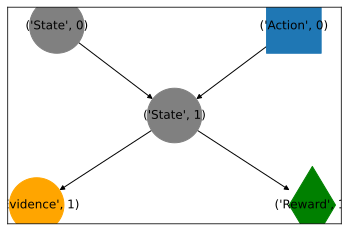

In [4]:
ddn.draw()

## Initializing the network for the next time-step

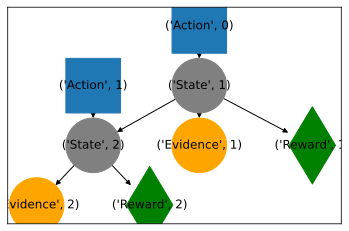

In [5]:
ddn.initialize()
ddn.draw()

In [6]:
# Check evidence from previous time-step
ddn.knowns

{('Evidence', 1): 1, ('Reward', 1): 0}

In [7]:
# Query the next time-step
ddn.query(query=[("Evidence", 2), ("Reward", 2)], evidence={("Action", 1): 0, ("Action", 0): 1})

,"(Evidence, 2)","(Reward, 2)",Prob
0,0,0,0.501
1,0,1,0.075
2,1,0,0.150
3,1,1,0.274
